# Data cleaning and Exploration for housing in Mexico

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [20]:
df1 = pd.read_csv(r"C:\Users\AFC\Downloads\real estate data\mexico-real-estateN-1.csv")
df2 = pd.read_csv(r"C:\Users\AFC\Downloads\real estate data\mexico-real-estateN-2.csv")
df3 = pd.read_csv(r"C:\Users\AFC\Downloads\real estate data\mexico-real-estateN-3.csv")

In [21]:
df1

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"
...,...,...,...,...,...,...,...
695,696,house,Morelos,NaN,NaN,310,"$237,089.17"
696,697,house,Yucatán,21.050653,-89.558841,334,"$137,017.34"
697,698,house,Yucatán,21.343796,-89.262060,130,"$110,404.35"
698,699,apartment,Nuevo León,NaN,NaN,155,"$184,446.42"


The first part of any data science project is preparing your data. The first step of any data preparation is importing your raw data and cleaning it.

1. Cleaning DataFrame1

In [22]:
#inspecting the data
# df1.info()
# df1.shape

# removing unwanted column called  "unamed: 0"
df1.drop(columns = ["Unnamed: 0"], inplace = True)

In [23]:
#dropping all rows that have null values 

df1.dropna(inplace = True)
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
5,house,Yucatán,21.052583,-89.538639,205,"$105,191.37"


In [24]:
#Cleaning df1 by dropping rows with NaN values. 
#Then remove the "$" and "," characters from "price_usd" 
#and recast the values in the column as floats.
df1['price_usd'] = df1['price_usd'].str.replace('$','',regex = False).str.replace(',','',regex = False).astype(float)

In [25]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


2. Cleaning DataFrame 2

In [26]:
df2.head()


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [27]:
#inspecting the data
df2.info()
# removing unwanted column called  "unamed: 0"
df2.drop(columns = ["Unnamed: 0"], inplace = True)

#drop all NaN rows
df2.dropna(inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            571 non-null    float64
 4   lon            571 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 38.4+ KB


In [28]:
#create new column "price_used" from price_mxm(mexican pesos) and drop price_mxn column
#data was collected in 2014, a dollar cost 19 pesos
df2['price_usd'] = (df2['price_mxn'] / 19).round(2)
df2.drop(columns = ['price_mxn'], inplace = True)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  571 non-null    object 
 1   state          571 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        571 non-null    int64  
 5   price_usd      571 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.2+ KB


3. Cleaning DataFrame 3

In [30]:
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [31]:
# removing unwanted column called  "unamed: 0"
df3.drop(columns = ["Unnamed: 0"], inplace = True)

#drop all NaN rows
df3.dropna(inplace= True)

In [32]:
#splitting lat-lon column into two columns 
#lat and lon and changing their data type from object to float
df3[['lat','lon']] = df3['lat-lon'].str.split(',', expand = True)
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [33]:
df3['lat'] = df3['lat'].astype(float)
df3['lon'] = df3['lon'].astype(float)

#drop lat-lon column
df3.drop(columns = ['lat-lon'], inplace = True)

In [34]:
df3.head()

,property_type,place_with_parent_names,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,71,48550.59,19.525890,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,233,168636.73,19.264054,-99.572753
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,175,102763.00,20.689157,-103.366728


In [35]:
#create state column from place_with_parent_names column then drop place_with_parent_names column
df3['state'] = df3['place_with_parent_names'].str.split('|', expand = True)[2]
df3.drop(columns = ['place_with_parent_names'], inplace = True)
df3.head()

,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71,48550.59,19.525890,-99.151703,Distrito Federal
1,house,233,168636.73,19.264054,-99.572753,Estado de México
2,house,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175,102763.00,20.689157,-103.366728,Jalisco


In [36]:
#Now that i have cleaned all three dataframes,
#it's time to combine them into a single DataFrame to analyze.

df = pd.concat([df1,df2,df3])
print(df.shape)
df.head()
df.info()

(1736, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 94.9+ KB


In [37]:
df.to_csv('mexico_real_estate_clean.csv',index=False)


1. EXPOLORATORY DATA ANALYSIS

The next step in many data science projects is exploratory data analysis (EDA), where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

1. Location Data: "lat" and "lon"
They say that the most important thing in real estate is location, and we can see where where in Mexico our houses are located by using the "lat" and "lon" columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the scatter_mapbox from the plotly library.

In [39]:
#creating a box plot to view where our houses are located

fig = px.scatter_mapbox(
    df, # our dataframe
    lat = 'lat',
    lon = 'lon',
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house 

)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

By looking at the grapgh we can see that the propertys are spread out within mexico with a large concentration in the center around mexico city.


2. Categorical Data: "State" - Even though we can get a clear picture of how many propertys we have by state by looking at the map, we can get the exact number by using the state column

In [40]:
#top ten states with propertys
df['state'].value_counts(ascending = False).head(10)

Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: state, dtype: int64

3. Numerical Data: now that we know where our houses are located we are going to use describtive statistics to know how much these houses cost on average, how big the houses are in terms of size.

In [41]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


While using numbers is good to view data, using visualizations make it even eaier to understand and absorbd data

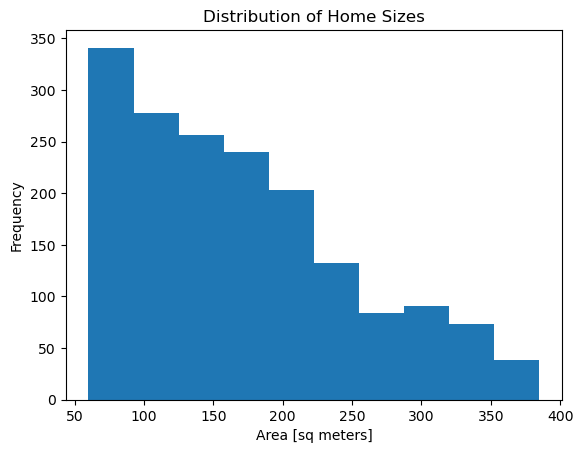

In [42]:
plt.hist(df['area_m2'])
plt.xlabel ("Area [sq meters]")
plt.ylabel ("Frequency")
plt.title ("Distribution of Home Sizes");


As you can see with the histogram we have a skewed distribution due to the fact that theres a large proportion of houses between the size range of 50 - 150 square meters, which makes sense because the smaller the size of houses the cheaper the price which results in the average being pulled towards the left side which causes a skewed distribution

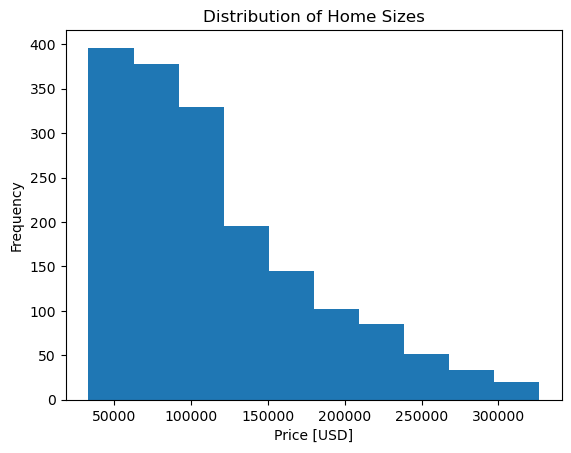

In [43]:
plt.hist(df['price_usd'])
plt.xlabel ("Price [USD]")
plt.ylabel ("Frequency")
plt.title ("Distribution of Home Sizes");

Looking at the histogram for the prices, you can see that the distribution is even more skewed


Now that I have cleaned my data and have a basic understanding of my data through EDA. it is time to answer some reserach questions

**1. Which state has the most expensive real estate market?**

In [44]:
mean_price_per_state = df.groupby("state")["price_usd"].mean().sort_values(ascending = False)
mean_price_per_state 

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

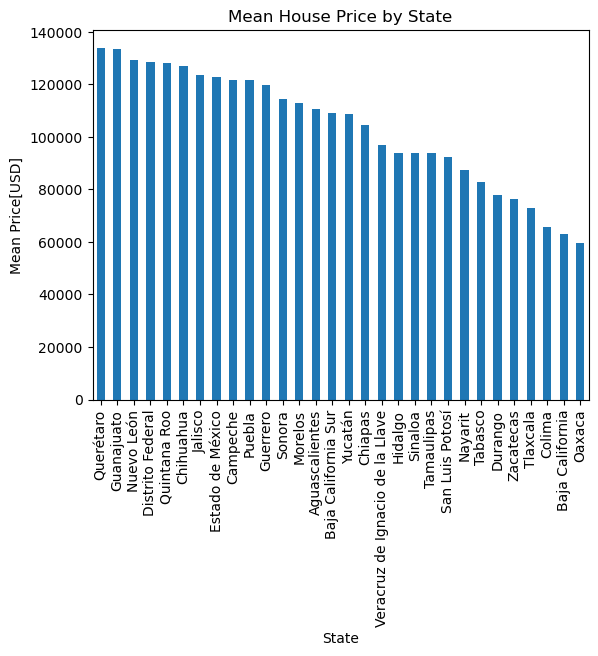

In [45]:
#lets visualize the data
mean_price_per_state.plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Mean Price[USD]",
    title = "Mean House Price by State"
);

Something odd that i noticed about the data is that how is Querétaro having the highest average mean price for houses when according to data from https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP Querétaro has a low GDP compared to most states, so there is a disconnect somehwere. Maybe in Querétaro they have bigger houses with bigger prices compared to Mexico city which has the highest GDP and has smaller houses with high prices? So to further deep dive this disconnect i will visualize the mean price per square feet in each state.

In [46]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

In [47]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


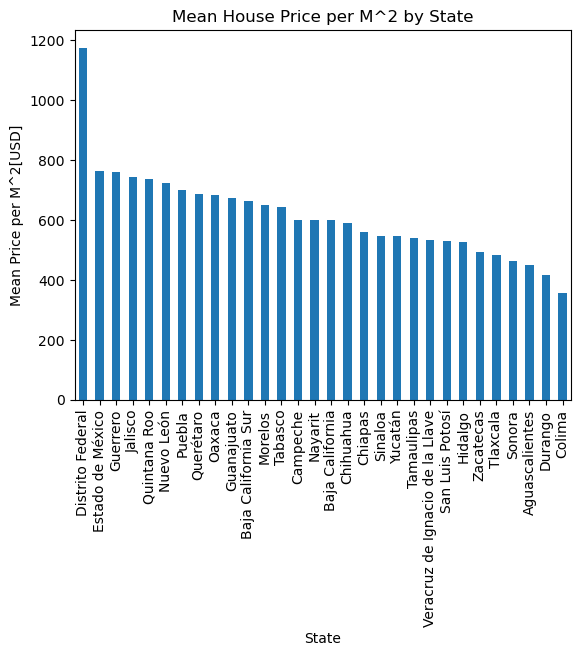

In [48]:
mean_price_per_m2 = df.groupby('state')['price_per_m2'].mean().sort_values(ascending = False)
mean_price_per_m2.plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Mean Price per M^2[USD]",
    title = "Mean House Price per M^2 by State"
);

So looking at this bar graph, this makes more sense as Distrito Federal  is the most expensive state by mean price per m2 and also has the highest GDP and Colima has the second lowest GDP and the lowest mean price per m2 which matches. So in conclusion, looking at the mean price per m2 is a much better represenation of the real estate in mexico

To answer the the research question: **Mexico City (Distrito Federal)** is by far the most expensive market. Furthermore many of the 10 ten states by mean price per m2 are in the top ten GDP states in the country which shows true refelection of the real estate in mexico


**2. Is there a relationship between home size and price?**

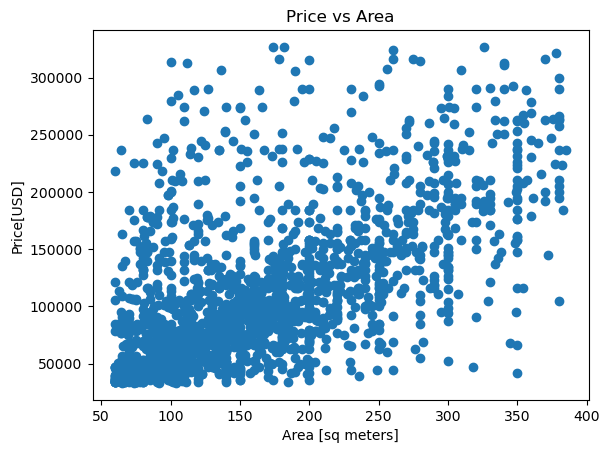

In [49]:
plt.scatter(x= df['area_m2'], y = df['price_usd'])
plt.xlabel ("Area [sq meters]")
plt.ylabel ("Price[USD]")
plt.title ("Price vs Area");

As you can see from the scatter plot, we can see that theres a general trend as house size increases the higher the price. Furthermore i will be using correlation to show the relationship numerically

In [50]:
price_area_correlation = df['area_m2'].corr(df['price_usd'])
price_area_correlation

0.5855182453232063

Answer: So since the the the correlation is 0.5 it shows moderate correlation between price and area per square meter. Other factors also comes into place that influences the price